In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)
churn = churn.drop('Unnamed: 0', axis = 1)
churn.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,0,1,1,0,1,1,0,0,3,1,1,102.440,2514.50,13.43,327.0,494.00,2,78,1,1,90303,27778,5337,2.0,1,1,1,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,0,0,0,0,0,0,0,0,3,1,1,79.560,2868.15,0.00,430.0,234.21,2,80,1,1,90602,26265,2793,3.0,1,0,1,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,0,0,1,0,0,0,0,0,3,1,1,81.172,2135.50,0.00,427.0,89.91,2,72,0,1,90660,63288,4638,1.0,0,0,1,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,0,0,0,0,0,0,0,0,3,1,3,73.268,70.45,0.00,0.0,15.28,2,76,1,2,90720,21343,3964,5.0,7,0,1,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,0,1,1,0,0,1,0,0,3,1,1,47.112,2651.20,40.95,689.0,0.00,1,66,1,0,91024,10558,5444,2.0,2,1,1,1


In [3]:
X = churn.iloc[:, 0:37] 
y = churn.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    stratify = y, 
                                                    random_state = 0)

print(X_train)
print(np.unique(y_train))

      Referred_a_Friend  Number_of_Referrals  Tenure_in_Months  Offer  \
3714                  0                    0                19    4.0   
521                   1                    5                72    1.0   
3409                  1                    3                45    2.0   
256                   0                    0                 2    5.0   
2860                  0                    0                12    4.0   
...                 ...                  ...               ...    ...   
3127                  1                    1                16    2.0   
1176                  1                    4                 1    5.0   
862                   0                    0                32    4.0   
6093                  0                    0                21    4.0   
6659                  0                    0                 9    3.0   

      Phone_Service  Avg_Monthly_Long_Distance_Charges  Multiple_Lines  \
3714              1                              

In [17]:
knn_param = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn, knn_param)
knnCV.fit(X_train, y_train)
print(knnCV.best_estimator_)
y_pred = knnCV.predict(X_train)
print(f1_score(y_train, y_pred))

KNeighborsClassifier(n_neighbors=11)
0.37248479176415533


[array([30]), array([24]), array([18]), array([22]), array([35]), array([18]), array([13]), array([33]), array([34]), array([22])]
0.7428977272727273


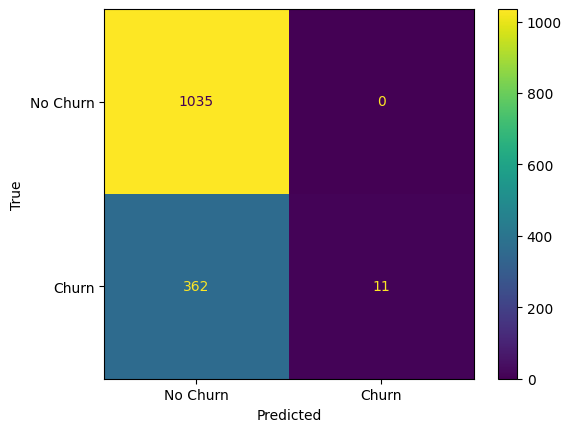

In [23]:
knn = KNeighborsClassifier(n_neighbors = 11)
clf = BaggingClassifier(estimator = knn, 
                        n_estimators = 10, 
                        max_samples = 0.9, 
                        max_features = 1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.estimators_features_)
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['No Churn', 'Churn'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

print(accuracy_score(y_test,y_pred))

In [33]:
feature_names = churn.columns
for i, estimator_features in enumerate(clf.estimators_features_):
    used_features = [feature_names[idx] for idx in estimator_features]
    print(f"Feature {i+1}: {used_features}")

Feature 1: ['Zip_Code']
Feature 2: ['Total_Extra_Data_Charges']
Feature 3: ['Contract']
Feature 4: ['Total_Regular_Charges']
Feature 5: ['Product/Service_Issues_Reported']
Feature 6: ['Contract']
Feature 7: ['Premium_Tech_Support']
Feature 8: ['Churn_Category']
Feature 9: ['Total_Customer_Svc_Requests']
Feature 10: ['Total_Regular_Charges']
